## 1. Tools for text processing
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 45%" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_38/img/Moby_Dick_p510_illustration.jpg"> </p>
<p>What are the most frequent words in Herman Melville's novel, Moby Dick, and how often do they occur?</p>
<p>In this notebook, we'll scrape the novel <em>Moby Dick</em> from the website <a href="https://www.gutenberg.org/">Project Gutenberg</a> (which contains a large corpus of books) using the Python package <code>requests</code>. Then we'll extract words from this web data using <code>BeautifulSoup</code>. Finally, we'll dive into analyzing the distribution of words using the Natural Language ToolKit (<code>nltk</code>). </p>
<p>The <em>Data Science pipeline</em> we'll build in this notebook can be used to visualize the word frequency distributions of any novel that you can find on Project Gutenberg. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and includes a great deal of text.</p>
<p>Let's start by loading in the three main Python packages we are going to use.</p>

In [25]:
# Importing requests, BeautifulSoup and nltk
# ... YOUR CODE FOR TASK 1 ...
import requests, nltk
from bs4 import BeautifulSoup

## 2. Request Moby Dick
<p>To analyze Moby Dick, we need to get the contents of Moby Dick from <em>somewhere</em>. Luckily, the text is freely available online at Project Gutenberg as an HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .</p>
<p><strong>Note</strong> that HTML stands for Hypertext Markup Language and is the standard markup language for the web.</p>
<p>To fetch the HTML file with Moby Dick we're going to use the <code>request</code> package to make a <code>GET</code> request for the website, which means we're <em>getting</em> data from it. This is what you're doing through a browser when visiting a webpage, but now we're getting the requested page directly into Python instead. </p>

In [27]:
# Getting the Moby Dick HTML 
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
# ... YOUR CODE FOR TASK 3 ...
for i in range(2000):
    print(html[i])

<
?
x
m
l
 
v
e
r
s
i
o
n
=
"
1
.
0
"
 
e
n
c
o
d
i
n
g
=
"
u
t
f
-
8
"
?
>






<
!
D
O
C
T
Y
P
E
 
h
t
m
l



 
 
 
P
U
B
L
I
C
 
"
-
/
/
W
3
C
/
/
D
T
D
 
X
H
T
M
L
 
1
.
0
 
S
t
r
i
c
t
/
/
E
N
"



 
 
 
"
h
t
t
p
:
/
/
w
w
w
.
w
3
.
o
r
g
/
T
R
/
x
h
t
m
l
1
/
D
T
D
/
x
h
t
m
l
1
-
s
t
r
i
c
t
.
d
t
d
"
 
>






<
h
t
m
l
 
x
m
l
n
s
=
"
h
t
t
p
:
/
/
w
w
w
.
w
3
.
o
r
g
/
1
9
9
9
/
x
h
t
m
l
"
 
l
a
n
g
=
"
e
n
"
>



 
 
<
h
e
a
d
>



 
 
 
 
<
t
i
t
l
e
>



 
 
 
 
 
 
M
o
b
y
 
D
i
c
k
;
 
O
r
 
t
h
e
 
W
h
a
l
e
,
 
b
y
 
H
e
r
m
a
n
 
M
e
l
v
i
l
l
e



 
 
 
 
<
/
t
i
t
l
e
>



 
 
 
 
<
s
t
y
l
e
 
t
y
p
e
=
"
t
e
x
t
/
c
s
s
"
 
x
m
l
:
s
p
a
c
e
=
"
p
r
e
s
e
r
v
e
"
>






 
 
 
 
b
o
d
y
 
{
 
b
a
c
k
g
r
o
u
n
d
:
#
f
a
e
b
d
0
;
 
c
o
l
o
r
:
b
l
a
c
k
;
 
m
a
r
g
i
n
-
l
e
f
t
:
1
5
%
;
 
m
a
r
g
i
n
-
r
i
g
h
t
:
1
5
%
;
 
t
e
x
t
-
a
l
i
g
n
:
j
u
s
t
i
f
y
 
}



 
 
 
 
P
 
{
 
t
e
x
t
-
i
n
d
e
n
t
:
 
1
e
m
;
 
m
a
r
g
i
n
-
t
o
p
:
 
.
2
5
e
m
;
 
m
a


## 3. Get the text from the HTML
<p>This HTML is not quite what we want. However, it does <em>contain</em> what we want: the text of <em>Moby Dick</em>. What we need to do now is <em>wrangle</em> this HTML to extract the text of the novel. For this we'll use the package <code>BeautifulSoup</code>.</p>
<p>Firstly, a word on the name of the package: Beautiful Soup? In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. What Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease! In fact, the main object created and queried when using this package is called <code>BeautifulSoup</code>. After creating the soup, we can use its <code>.get_text()</code> method to extract the text.</p>

In [29]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
# ... YOUR CODE FOR TASK 3 ...
for i in range(32000, 34000):
    print(text[i])

t
l
y
 
o
v
e
r
 
h
i
m
,
 
a
n
d
 
p
r
o
b
a
b
l
y
 
k
i
l
l
e
d
 
h
i
m
 
i
n
 
a
 
m
o
m
e
n
t
.
”


 
 
 
 
 
 
 
 
 
—
“
T
h
e
 
W
h
a
l
e
 
a
n
d
 
h
i
s
 
C
a
p
t
o
r
s
,
 
o
r
 
T
h
e
 
W
h
a
l
e
m
a
n
’
s
 
A
d
v
e
n
t
u
r
e
s
 
a
n
d
 
t
h
e


 
 
 
 
 
 
 
 
W
h
a
l
e
’
s
 
B
i
o
g
r
a
p
h
y
,
 
g
a
t
h
e
r
e
d
 
o
n
 
t
h
e
 
H
o
m
e
w
a
r
d
 
C
r
u
i
s
e
 
o
f
 
t
h
e
 
C
o
m
m
o
d
o
r
e


 
 
 
 
 
 
 
 
P
r
e
b
l
e
.
”
 
B
y
 
R
e
v
.
 
H
e
n
r
y
 
T
.
 
C
h
e
e
v
e
r
.


 
 
 
 
 
 


 
 
 
 
 
 


 
 
 
 
 
 
 
 
“
I
f
 
y
o
u
 
m
a
k
e
 
t
h
e
 
l
e
a
s
t
 
d
a
m
n
 
b
i
t
 
o
f
 
n
o
i
s
e
,
”
 
r
e
p
l
i
e
d
 
S
a
m
u
e
l
,
 
“
I
 
w
i
l
l
 
s
e
n
d


 
 
 
 
 
 
 
 
y
o
u
 
t
o
 
h
e
l
l
.
”
 
—
L
i
f
e
 
o
f
 
S
a
m
u
e
l
 
C
o
m
s
t
o
c
k
 
(
t
h
e
 
m
u
t
i
n
e
e
r
)
,
 
b
y
 
h
i
s


 
 
 
 
 
 
 
 
b
r
o
t
h
e
r
,
 
W
i
l
l
i
a
m
 
C
o
m
s
t
o
c
k
.
 
A
n
o
t
h
e
r
 
V
e
r
s
i
o
n
 
o
f
 
t
h
e
 
w
h
a
l
e
-
s
h
i
p
 
G
l
o
b
e


 
 
 
 
 
 
 
 
n
a
r
r
a
t
i


## 4. Extract the words
<p>We now have the text of the novel! There is some unwanted stuff at the start and some unwanted stuff at the end. We could remove it, but this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is okay to leave it in.</p>
<p>Now that we have the text of interest, it's time to count how many times each word appears, and for this we'll use <code>nltk</code> – the Natural Language Toolkit. We'll start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.</p>

In [31]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
# ... YOUR CODE FOR TASK 4 ...
for i in range(8):
    print(tokens[i])

Moby
Dick
Or
the
Whale
by
Herman
Melville


## 5. Make the words lowercase
<p>OK! We're nearly there. Note that in the above 'Or' has a capital 'O' and that in other places it may not, but both 'Or' and 'or' should be counted as the same word. For this reason, we should build a list of all words in <em>Moby Dick</em> in which all capital letters have been made lower case.</p>

In [33]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    ... # YOUR CODE FOR TASK 5 ...
    words.append(word.lower())

# Printing out the first 8 words / tokens 
# ... YOUR CODE FOR TASK 5 ...
for i in range(8):
    print(words[i])

moby
dick
or
the
whale
by
herman
melville


## 6. Load in stop words
<p>It is common practice to remove words that appear a lot in the English language such as 'the', 'of' and 'a' because they're not so interesting. Such words are known as <em>stop words</em>. The package <code>nltk</code> includes a good list of stop words in English that we can use.</p>

In [35]:
# Getting the English stop words from nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')

# Printing out the first eight stop words
# ... YOUR CODE FOR TASK 6 ...
for i in range(6):
    print(sw[i])

i
me
my
myself
we
our


## 7. Remove stop words in Moby Dick
<p>We now want to create a new list with all <code>words</code> in Moby Dick, except those that are stop words (that is, those words listed in <code>sw</code>). One way to get this list is to loop over all elements of <code>words</code> and add each word to a new list if they are <em>not</em> in <code>sw</code>.</p>

In [37]:
# A new list to hold Moby Dick with No Stop words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    ... # YOUR CODE FOR TASK 7 ...
    if word not in sw:
        words_ns.append(word)

# Printing the first 5 words_ns to check that stop words are gone
# ... YOUR CODE FOR TASK 7 ...
for i in range(5):
    print(words_ns[i])

moby
dick
whale
herman
melville


## 8. We have the answer
<p>Our original question was:</p>
<blockquote>
  <p>What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?</p>
</blockquote>
<p>We are now ready to answer that! Let's create a word frequency distribution plot using <code>nltk</code>. </p>

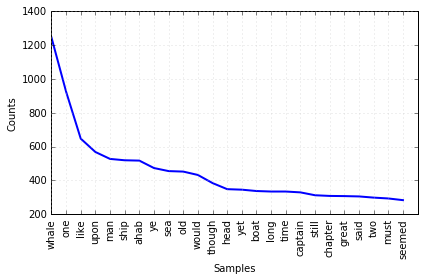

In [39]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
# ... YOUR CODE FOR TASK 8 ...
freqdist.plot(25)
#freqdist.show()

## 9. The most common word
<p>Nice! The frequency distribution plot above is the answer to our question. </p>
<p>The natural language processing skills we used in this notebook are also applicable to much of the data that Data Scientists encounter as the vast proportion of the world's data is unstructured data and includes a great deal of text. </p>
<p>So, what word turned out to (<em>not surprisingly</em>) be the most common word in Moby Dick?</p>

In [41]:
# What's the most common word in Moby Dick?
most_common_word = 'whale'